## Perceptron

In [7]:
import pandas as pd
from data import *
plt.style.use('ggplot')

In [8]:
repetitions = 200
estimate_func = lambda v: bipolar(0, v)
x_all = reproduce_x_times(x_bipolar, repetitions)
d_all = reproduce_x_times(d_bipolar, repetitions)
x_all = x_all + get_random_except_first_row(x_all.shape)
x_all[:, :5], d_all[:, :5]

(array([[ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ],
        [-0.98111184, -1.02460063,  0.97425089,  1.00487366, -0.99261553],
        [-0.98526306,  0.98090102, -0.97826802,  1.03708983, -1.00476499]]),
 array([[-1, -1, -1,  1, -1]]))

(array([[ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ],
        [-0.99734154, -0.98192234,  1.00729882,  0.97212199, -0.99686183],
        [-0.9511191 ,  0.95343142, -1.04115739,  1.040019  , -1.00266076]]),
 array([[-1, -1, -1,  1, -1]]))

In [9]:
test_size = int(x_all.shape[1] * 0.25)
train_size = int(x_all.shape[1] - test_size)
x_train, x_test = x_all[:, :train_size], x_all[:, train_size:]
d_train, d_test = d_all[:, :train_size], d_all[:, train_size:]
x_train.shape, x_test.shape, d_train.shape, d_test.shape

((3, 600), (3, 200), (1, 600), (1, 200))

((3, 600), (3, 200), (1, 600), (1, 200))

In [10]:
x_range = np.arange(-2, 4)
experiments_numb = 1000

In [11]:
perceptrons = []
for w_range in list(np.linspace(0, 1, num=100))[1:]:
    p = Perceptron(x_train, d_train, x_test, d_test, estimate_func, 0.1, (-w_range, w_range))
    for i in range(experiments_numb):
        p.count()
    perceptrons.append(p)
len(perceptrons)

99

99

,"weights range (-v, v)",average epoch count
0,0.010101,2.816
1,0.020202,2.854
2,0.030303,2.862
3,0.040404,2.847
4,0.050505,2.865
...,...,...
94,0.959596,2.860
95,0.969697,2.845
96,0.979798,2.845
97,0.989899,2.872


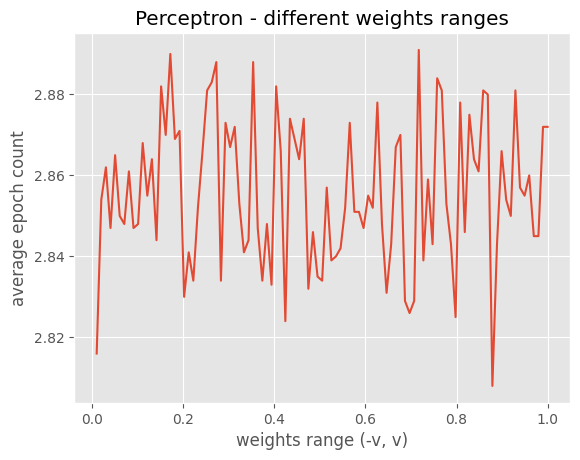

,"weights range (-v, v)",average epoch count
0,0.010101,2.842
1,0.020202,2.846
2,0.030303,2.825
3,0.040404,2.839
4,0.050505,2.857
...,...,...
94,0.959596,2.849
95,0.969697,2.844
96,0.979798,2.833
97,0.989899,2.864


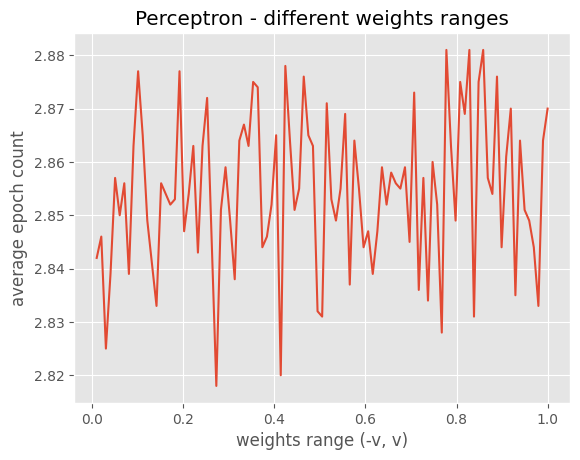

In [12]:
plt.plot([x.wrange[1] for x in perceptrons], [x.average_epoch_count for x in perceptrons])
plt.title("Perceptron - different weights ranges")
plt.xlabel("weights range (-v, v)")
plt.ylabel("average epoch count")
pd.DataFrame({"weights range (-v, v)":[x.wrange[1] for x in perceptrons], "average epoch count":[x.average_epoch_count for x in perceptrons]})